In [75]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import numba

# Education Subsidies with Private Information

## The rich agent problem

$$
\max_{\pi} -\frac{\pi}{R} + 3 \ln(1 + \pi) + (1+\epsilon) (1 - \ln(1+\pi))
$$

Taking first order conditions we get:

$$
1 + \pi^*_r = (2-\epsilon) R
$$

## The poor agent problem

$$
\max_{\pi} -\pi + 3 \ln(1 + \pi) + (1 -\epsilon) (1 - log(1+\pi))
$$

Taking first order conditions we get:

$$
1 + \pi^*_p = (2 + \epsilon) = \frac{2 + \epsilon}{2 - \epsilon} (2 - \epsilon) < R (2 - \epsilon) = 1 + \pi^*_r
$$

Therefore we have that rich agents invest more in education than poor agents in this model.

## Introducing an education subsidy

If types are observable, only the problem of the poor agent will change with the introduction of the education subsidy. The poor agent problem becomes:
$$
\max_{\pi} -\frac{\pi}{1+T} + (3 - T) \ln(1 + \pi) + (1 -\epsilon) (1 - \ln(1+\pi))
$$

Taking first order conditions we get:

$$
1 + \pi^*_p(T) = (2 - T + \epsilon) (1 + T) = (2 + \epsilon) + (1 + \epsilon) T - T^2
$$

In this setup, effort is a concave function of the subsidy. Effort increases up to $ T^* = \frac{1+\epsilon}{2}$ where it reaches a maximum and starts decresing.
Therefore maximum effort $ 1 + \pi^*_p(T^*) = 2 + \epsilon + \frac{(1 + \epsilon)^2}{4}$.

For a planner minimizing the square difference $(\pi^*_r - \pi^*_p(T))^2$, if $\pi^*_r > \pi^*_p(T^*)$ it is optimal for the planner to set $T = T^*$

## Adding private information

Now the planner does not observe the type of each agent. An education subsidy scheme has to provide incentives for the rich agent not to participate in the educational subsidy. The planner problem under private information becomes:
$$\min_{T} (\pi^*_r - \pi^*_p(T))^2$$

subject to:

$$ -\frac{\pi_p(T)}{1+T} + (3 - T) \ln(1 + \pi_p(T)) + (1 -\epsilon) (1 - \ln(1+\pi_p(T))) \geq -\pi_p(0) + 3 \ln(1 + \pi_p(0)) + (1 -\epsilon) (1 - \ln(1+\pi_p(0)))$$

$$ -\frac{\pi_r(T)}{R+T} + (3 - T) \ln(1 + \pi_r(T)) + (1 +\epsilon) (1 - \ln(1+\pi_r(T))) \leq -\frac{\pi_r(0)}{R} + 3 \ln(1 + \pi_r(0)) + (1 +\epsilon) (1 - \ln(1+\pi_r(0)))$$

where we already now $\pi_p(0), \pi_p(T), \pi_r(0)$

The rich problem conditional on participating to the education program is:
$$
\max_{\pi} -\frac{\pi}{1+T} + (3 - T) \ln(1 + \pi) + (1 +\epsilon) (1 - \ln(1+\pi))
$$

Taking first order conditions we get:

$$
1 + \pi^*_r(T) = (R + T) (2 - T - \epsilon) = (2 - \epsilon)R + (2 - R -\epsilon) T - T^2
$$


We can rewrite the planner problem as:
$$\min_{T} (\pi^*_r - \pi^*_p(T))^2$$

subject to:

$$ -\frac{(2 + \epsilon) + (1 + \epsilon) T - T^2 - 1}{1+T} + (3 - T) \ln((2 + \epsilon) + (1 + \epsilon) T - T^2) + (1 -\epsilon) (1 - \ln((2 + \epsilon) + (1 + \epsilon) T - T^2)) \geq -(1 + \epsilon) + 3 \ln(2 + \epsilon) + (1 -\epsilon) (1 - \ln(2 + \epsilon))$$

$$ -\frac{(2 - \epsilon)R + (2 - R -\epsilon) T - T^2 - 1 }{R+T} + (3 - T) \ln((2 - \epsilon)R + (2 - R -\epsilon) T - T^2) + (1 +\epsilon) (1 - \ln((2 - \epsilon)R + (2 - R -\epsilon) T - T^2) \leq -\frac{(2-\epsilon) R - 1}{R} + 3 \ln((2-\epsilon) R) + (1 +\epsilon) (1 - \ln((2-\epsilon) R))$$



<ipython-input-183-ab2fbe9fa436>:12: RuntimeWarning: invalid value encountered in log
  RHS =  - (p_r(T))/(T+R) + np.log(p_r(T)) * (2 - ϵ - T)


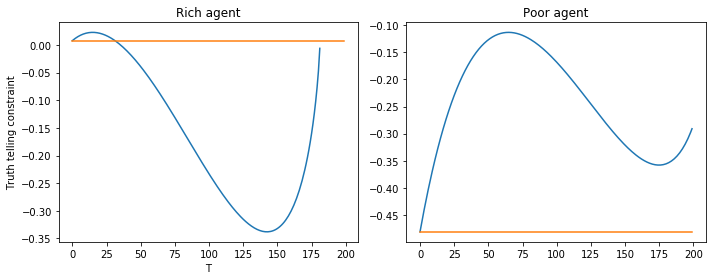

In [183]:
ϵ = 0.18
R = 1.5
T = np.linspace(0,2, 200)

p_r = lambda T: (2-ϵ)*R + (2 - ϵ - R)*T - T**2
p_p = lambda T: (2+ϵ) + (1 + ϵ)*T - T**2

LHS_r = np.ones_like(T)*(-(2 - ϵ) + np.log((2-ϵ)*R)*(2-ϵ))
RHS_p = np.ones_like(T)*(-(2 + ϵ) + np.log(2+ϵ)*(2+ϵ))

def TT_r(T):
    RHS =  - (p_r(T))/(T+R) + np.log(p_r(T)) * (2 - ϵ - T)
    return RHS


def TT_p(T):
    LHS =  - p_p(T)/(T+1) + np.log(p_p(T))*(2 + ϵ - T)
    return LHS



_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.set_title('Rich agent')
ax2.set_title('Poor agent')

ax1.plot(TT_r(T))
ax1.plot(LHS_r)
ax2.plot(TT_p(T))
ax2.plot(RHS_p)
ax1.set(xlabel="T", ylabel="Truth telling constraint")
plt.tight_layout()


Text(0, 0.5, 'effort')

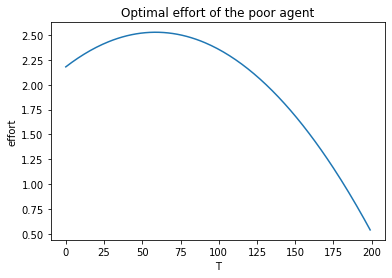

In [176]:
plt.plot(p_p(T))
plt.title("Optimal effort of the poor agent")
plt.xlabel("T")
plt.ylabel("effort")

# Insuring Preference Shocks

The problem can be formulated as:
$$
P(w) = \max_{c_1, c_2, w_1, w_2} \frac{1}{2} (- c_1 + \tilde{\beta} P(w_1) - c_2 + \tilde{\beta} P(w_2)
$$

subject to:
$$
\theta_1 \ln(c_1) + \beta_1 w_1 \geq \theta_1 \ln(c_2) + \beta_1 w_2
$$

$$
\theta_2 \ln(c_2) + \beta_2 w_2 \geq \theta_2 \ln(c_1) + \beta_2 w_1
$$

$$
\frac{1}{2} ( \theta_1 \ln(c_1) + \beta_1 w_1 + \theta_2 \ln(c_2) + \beta_2 w_2)  \geq w
$$

Observe that the first two constraints that we can't have $c_1 > c_2$ and $w_1 > w_2$ or $c_1 < c_2$ and $w_1 < w_2$ simultaneously or one agent would have an incentive to lie.

Now adding the two budget constraints we get: 

$$
(\theta_1 - \theta_2) (\ln(c_1) - \ln(c_2)) \geq (\beta_1 - \beta_2) (w_2 - w_1)
$$

If $w_2 < w_1$ and $c_1 < c_2$ the left hand side is negative while the right hand side is positive, contradicting the inequality. Therefore we have $w_1 < w_2$ and $c_2 < c_1$

Taking first order conditions we have:
$$
-\frac{1}{2} + \mu_1 \frac{\theta_1}{c_1} - \mu_2 \frac{\theta_2}{c_1} + \frac{\lambda}{2} \frac{\theta_1}{c_1} = 0
$$

$$
-\frac{1}{2} + \mu_2 \frac{\theta_2}{c_2} - \mu_1 \frac{\theta_1}{c_2} + \frac{\lambda}{2} \frac{\theta_2}{c_2} = 0
$$

$$
\frac{1}{2} \tilde{\beta}P^{'}(w_1) + \mu_1 \beta_1 - \mu_2 \beta_2 + \beta_1 \frac{\lambda}{2}  = 0
$$

$$
\frac{1}{2} \tilde{\beta}P^{'}(w_2) + \mu_2 \beta_2 - \mu_1 \beta_1 + \beta_2 \frac{\lambda}{2}  = 0
$$

and the envelope condition $P^{'}(w) = -\lambda$.

Summing the last two equations we get: 

$$
\frac{1}{2} \tilde{\beta}(P^{'}(w_1) + P^{'}(w_2)) + (\beta_1 + \beta_2) \frac{\lambda}{2}  = 0
$$

so that:
$$
P^{'}(w) = \mathbb{E}\left[P^{'}(w^{'})\right]
$$

and therefore $P^{'}$ is a martingale and converges over time. To show that we have immiseration, we are going to show that utility promises spread out. 

Suppose it is not spread out so that $w_1 = w_2 = w$. By the truth telling constraints we obtain that $c_1 = c_2$ as well. 
Now looking at the other two optimization constraints and using that $c_1 = c_2$ we get:

$$
\mu_1 \theta_1 - \mu_2 \theta_2 + \frac{\lambda}{2} \theta_1 = \mu_2 \theta_2 - \mu_1 \theta_1 + \frac{\lambda}{2} \theta_2
$$

implying that 
$$
\theta_1 = \theta_2
$$
which is a contradiction. 

Hence we have $w_1 \leq w \leq w_2$. Using the result from class we have that 
$ \lim_{t \to \infty} P^{'}(w) = 0$ and $ \lim_{t \to \infty} w = -\infty$ as expected.


# Computing Private Information Problems

In [249]:
def makegrid(N):
    a = np.array([0.2, 0.4])

    q = np.array([1, 2])

    c = np.linspace(.1, 2, N)
    
    return a, q, c

a, q, c = makegrid(20)

Π = np.array([[0.8, 0.2],
            [0.2, 0.8]])   # First row for a = 0.2, first column for q = 1

@numba.njit()
def utility(c,a):
    return (np.sqrt(c)) * (1 - a)



## Write down constraints

In [253]:
w0 = np.array([1])
np.set_printoptions(suppress=True)
factor = np.kron(q,np.ones(len(c))) - np.kron(np.ones(len(q)),c)
# print(factor.shape)
factor = - np.kron(factor, np.ones(len(a)))

# print(factor)

In [254]:
#set up equality constraint (2)
def bayes_constraint(a,q,c):
    constraint = np.empty((len(a)*len(q), 80))    # 2*2 constraints here, multiplying a vector of size 2*2*20
    index = 0
    for ia, a_cur in enumerate(a):
        for iq, q_cur in enumerate(q):
            p  = Π[ia, iq]                                # The conditional probability
            qc = np.kron(p,np.ones(len(c)*len(q)))       # Right hand side factor of the equality
#             print(qc)
            RHS = np.kron(qc, [(ia==0)*1, (ia==1)*1])   # Keep non-zero coefficients for abar only
            LHS = np.kron(np.kron([(iq==0)*1,(iq==1)*1],np.ones(len(c))), [(ia==0)*1, (ia==1)*1])
            constraint[index, :] = LHS - RHS
            index += 1
    
    A_eq_2 = constraint[[1,3],:]
    return A_eq_2

# test2 = bayes_constraint(a,q,c)
# print(test2)
# print(test2 @ np.ones(80))

In [255]:
#set up inequality constraint (1)
def promise_keeping(c,a):
    U = np.empty(len(c)*len(a))
    index = 0
    for ic, c_cur in enumerate(c):
        for ia, a_cur in enumerate(a):
            U[index] = utility(c_cur, a_cur)
            index +=1
    U = - np.kron(np.ones(len(q)), U)
    return U

U = promise_keeping(c,a)
# print(U.shape)

In [256]:
#set up inequality constraint (2)
def incentive(c,a):
    EU = np.empty(len(c)*len(a)*len(q))
    U = np.empty(len(c)*len(a)*len(q))
    index = 0
    #compute expected utility
    for iq, q_cur in enumerate(q):
        for ic, c_cur in enumerate(c):
            for ia, a_cur in enumerate(a):
                EU[index] = utility(c_cur, a[1-ia])* (Π[1-ia,iq] / Π[ia,iq])
                index += 1
                
    indexU = 0
    for iq, q_cur in enumerate(q):
        for ic, c_cur in enumerate(c):
            for ia, a_cur in enumerate(a):
                U[indexU] = utility(c_cur, a_cur)
                indexU +=1
                
    matfactor = np.kron(np.kron(np.ones(len(q)),np.ones(len(c))), np.array([[1,0],[0,1]]))
#     print(matfactor)
#     print("EU",np.multiply(matfactor,EU[np.newaxis, :]))
#     print("U",np.multiply(matfactor,U[np.newaxis, :]))
    constraint = np.multiply(matfactor,EU[np.newaxis, :]) - np.multiply(matfactor,U[np.newaxis, :])
    
    return constraint


# test1 = incentive(c,a)
# print(test1 @ np.ones(80))

In [270]:

def set_constraints(w0, a, c, q, info=False):
    # Maximization over sum Pi q - c = minimization over sum Pi c - q
    factor = np.kron(q,np.ones(len(c))) - np.kron(np.ones(len(q)),c)
    factor = - np.kron(factor, np.ones(len(a)))

    # equality constraint 1: Probability distribution constraint, sum over all possible states
    A_eq_1 = np.ones(len(factor))


    #equality constraint 2: Bayes Rule
    A_eq_2 = bayes_constraint(a,q,c)

    beq = np.concatenate((np.array([1]), np.zeros(len(q)*len(a) - 2)))
    
    
    #inequality constraint 1: Promise keeping constraint
    A_ub_1 = promise_keeping(c,a)   # Loop over a first, then c, then duplicate for each q
    
    if info == False:
        #inequality constraint 2: promise keeping constraint
        A_ub_2 = incentive(c,a)


    if info == True:
        A_ub_2 = np.zeros((len(a)*(len(a)-1),len(factor)))    # No incentive compatibility constraint under full info
    
    
    bub = np.concatenate(( np.array([- w0]), np.zeros(len(a)*(len(a)-1))))

    
    Aeq = np.concatenate((A_eq_1[np.newaxis, :], A_eq_2))
    Aub = np.concatenate((A_ub_1[np.newaxis, :],A_ub_2))
                   
    return factor, Aub, bub, Aeq, beq


factor, Aub, bub, Aeq, beq = set_constraints(w0[0], a, c, q)
print(Aeq.shape)
print(beq.shape)
print(Aub.shape)
print(bub.shape)
print(bub)

(3, 80)
(3,)
(3, 80)
(3,)
[-0.  0.  0.]


In [271]:
def linear_solve(w0, info=False):
    a, q, c = makegrid(len(w0))
    sol = np.empty((len(w0),80))
    res = np.empty(len(w0), dtype='object')
    
    for iw, w_cur in enumerate(w0):
        factor, Aub, bub, Aeq, beq = set_constraints(w_cur, a, c, q, info)
        res[iw] = linprog(c=factor, A_ub=Aub, b_ub=bub, A_eq = Aeq, b_eq=beq, method="revised simplex")
        sol[iw,:] = res[iw].x   #w,q,c,q
#         print("Equality constraint",res.con)
#         print("Inequality constraint", res.slack)
#         print("Success?", res.success)
    return sol.reshape(20,2,20,2), res   #w,q,c,q
    


In [272]:
w0 = np.linspace(0, 1.1, 20)

π, result  = linear_solve(w0)



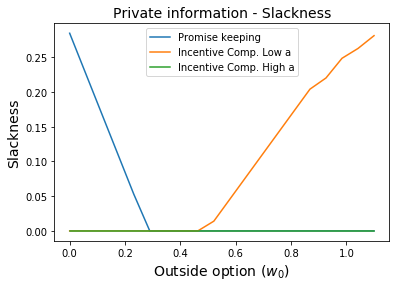

In [268]:
slacks = np.empty((3,len(w0)))
for iw in range(len(w0)):
    slacks[:, iw] = result[iw].slack


fig, ax = plt.subplots()
ax.plot(w0, slacks.T)
ax.set_title('Private information - Slackness', fontsize=14)
ax.set_xlabel('Outside option ($w_0$)', fontsize=14)
ax.set_ylabel('Slackness', fontsize=14)
ax.legend(labels=['Promise keeping', 'Incentive Comp. Low a', 'Incentive Comp. High a'])
plt.show()

The promise keeping constraint is not binding for low values of $w_0$. The incentive compatibility constraint for high effort is always binding since high effort lowers utility everything else equal. The incentive compatibility constraint for low effort types is binding only when the outside option is poor. This suggests that in the low effort state with poor outside option, the agent would be willing to put more effort. 

In [323]:
π_ = π*(π > 0.00001)   # Disregard grid error
print(nonzero[19,1,:,0])            #Example of randomization for a = 0.2 and q = 2


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.09261416
 0.10738584 0.        ]


In [324]:
randomized =np.count_nonzero(π_, axis=2)
print(randomized)

[[[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 2]
  [0 2]]

 [[0 2]
  [0 2]]

 [[0 2]
  [0 2]]

 [[0 2]
  [0 2]]

 [[1 2]
  [1 1]]

 [[1 2]
  [1 1]]

 [[1 2]
  [1 1]]

 [[1 2]
  [1 1]]

 [[1 2]
  [1 1]]

 [[1 2]
  [1 1]]

 [[1 2]
  [1 1]]

 [[2 0]
  [1 0]]

 [[2 0]
  [1 0]]

 [[1 0]
  [2 0]]

 [[1 0]
  [2 0]]]


We can see that consumption is randomized in a few cases where the vector of probabilities given a, q and w0 is non-zero for more than one cell. But this happens for contiguous consumption levels on the grid, suggesting that it is an artefact due to the finite grid. The true pure strategy would in fact be in between these two consumption grid points. In some sense it can be interpreted as an interpolation estimate.

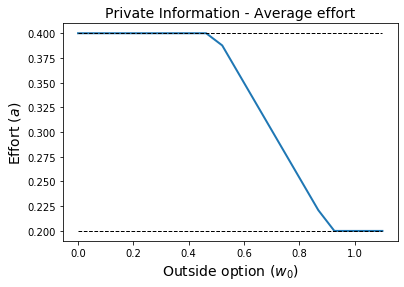

In [325]:
fig, ax = plt.subplots()

vecpi = π.reshape(20, 80)
veca = np.kron(np.ones(2 * 20), a)

effs = vecpi @ veca

hlinelow = a[0] * np.ones_like(w0)
hlinehigh = a[1] * np.ones_like(w0)

ax.plot(w0, effs, lw=2)
ax.plot(w0, np.array([hlinelow, hlinehigh]).T, 'k--', lw=1)
ax.set_title('Private Information - Average effort', fontsize=14)
ax.set_xlabel('Outside option ($w_0$)', fontsize=14)
ax.set_ylabel('Effort ($a$)', fontsize=14)
plt.show()

## Full information case

In [273]:
π_full, result_full  = linear_solve(w0, info=True)

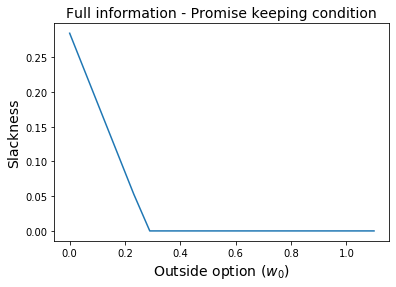

In [276]:
slack_full = np.empty((3,len(w0)))
for iw in range(len(w0)):
    slack_full[:, iw] = result[iw].slack


fig, ax = plt.subplots()
ax.plot(w0, slack_full[0,:], label="Promise keeping")
ax.set_title('Full information - Promise keeping condition', fontsize=14)
ax.set_xlabel('Outside option ($w_0$)', fontsize=14)
ax.set_ylabel('Slackness', fontsize=14)
# ax.legend(labels='Promise keeping')
plt.show()

As the outside option becomes more attractive, the participation constraint becomes binding for the full information planner as well. It starts binding at the same stage as before.

In [311]:
πzero = π_full*(π_full > 0.00001)   # Disregard grid error
print(nonzero[19,1,:,0])            #Example of randomization for a = 0.2 and q = 2


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.09261416
 0.10738584 0.        ]


In [312]:
test =np.count_nonzero(πzero, axis=2)
print(test)

[[[0 1]
  [0 1]]

 [[0 1]
  [0 1]]

 [[0 1]
  [0 1]]

 [[0 1]
  [0 1]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[0 1]
  [0 2]]

 [[1 1]
  [1 1]]

 [[1 1]
  [1 1]]

 [[1 1]
  [1 1]]

 [[1 1]
  [1 1]]

 [[1 1]
  [1 1]]

 [[1 1]
  [1 1]]

 [[1 1]
  [1 1]]

 [[1 0]
  [2 0]]

 [[1 0]
  [2 0]]

 [[1 0]
  [2 0]]]


We can see that consumption is randomized in a few cases where the vector of probabilities given a, q and w0 is non-zero for more than one cell. But this happens for contiguous consumption levels on the grid, suggesting that it is an artefact due to the finite grid. The true pure strategy would in fact be in between these two consumption grid points. In some sense it can be interpreted as an interpolation estimate.

## Comparing full information and private information

In [314]:
vecpi_full = π_full.reshape(20, 80)
veca_full = np.kron(np.ones(2 * 20), a)

effs_full = vecpi_full @ veca_full

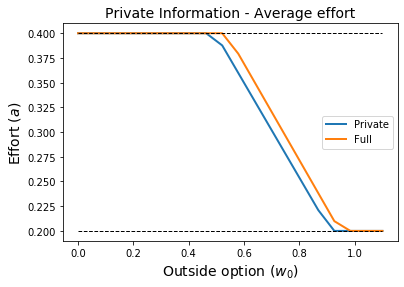

In [318]:
plt.plot(w0, effs, lw=2, label="Private")
plt.plot(w0, effs_full, lw=2, label="Full")
plt.plot(w0, np.array([hlinelow, hlinehigh]).T, 'k--', lw=1)
plt.title('Private Information - Average effort', fontsize=14)
plt.xlabel('Outside option ($w_0$)', fontsize=14)
plt.ylabel('Effort ($a$)', fontsize=14)
plt.legend(loc='best')
plt.show()

Average effort is weakly superior given outside option in the full information setting.

In [320]:
vecc = np.kron(np.kron(np.ones(len(q)),c), np.ones(len(a)))
cons_full = vecpi_full @ vecc

cons = vecpi @ vecc

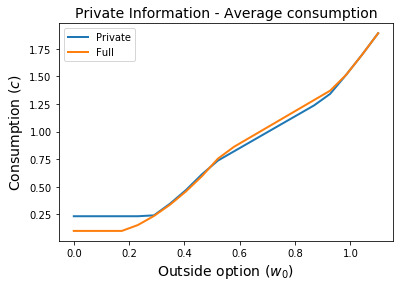

In [322]:
plt.plot(w0, cons, lw=2, label="Private")
plt.plot(w0, cons_full, lw=2, label="Full")
plt.title('Private Information - Average consumption', fontsize=14)
plt.xlabel('Outside option ($w_0$)', fontsize=14)
plt.ylabel('Consumption ($c$)', fontsize=14)
plt.legend(loc='best')
plt.show()

The planner can lower consumption in some states of the world under full information to an extent that would not be possible under incentive compatibility constraint. 